In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import pandas as pd

In [2]:
def lim(arr):
    for i in range(len(arr)):
        if np.isnan(arr[i]):
            return arr[:i], i
    return arr, len(arr)

In [3]:
excel = pd.read_excel('t10-dados dos videos.xlsx').to_numpy().T

Tar = excel[1]
Var = excel[2]
Iar = excel[3]
Rar = Var/Iar

Taq = excel[6]
Vaq = excel[7]
Iaq = excel[8]
Raq = Vaq/Iaq

Tar , limar = lim(Tar)
Rar = Rar[:limar]

Taq , limaq = lim(Taq)
Raq = Raq[:limaq]


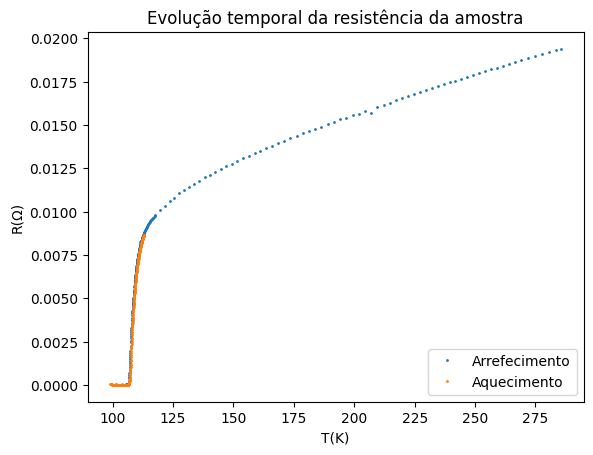

In [4]:
plt.plot(Tar, Rar, '.', markersize=2, label='Arrefecimento')
plt.plot(Taq, Raq, '.', markersize=2, label='Aquecimento')
plt.xlabel('T(K)')
plt.ylabel('R(Ω)')
plt.title('Evolução temporal da resistência da amostra')
plt.legend(loc='lower right')

Arrefecimento : 122 pontos
Aquecimento : 148 pontos


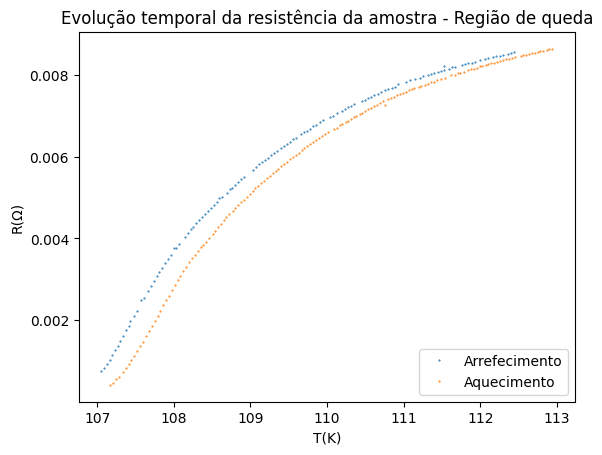

In [5]:
Tar2 = Tar[105:-25]
Rar2 = Rar[105:-25]

Taq2 = Taq[55:]
Raq2 = Raq[55:]

print(f"Arrefecimento : {len(Tar2)} pontos")
print(f"Aquecimento : {len(Taq2)} pontos")

plt.plot(Tar2, Rar2, '.', markersize=1, label='Arrefecimento')
plt.plot(Taq2, Raq2, '.', markersize=1, label='Aquecimento')
plt.xlabel('T(K)')
plt.ylabel('R(Ω)')
plt.title('Evolução temporal da resistência da amostra - Região de queda')
plt.legend(loc='lower right')

O traçado é suave mas não representa nenhum tipo de função específico. Assim, para ver se dá algo melhor, decidi colocar log-log. Ok, não correu como esperado. Normalmente eu via o loglog e via-se logo que era tipo uma exponencial ou uma reta ou algo. Neste caso não resultou. Mas mantenho o método.

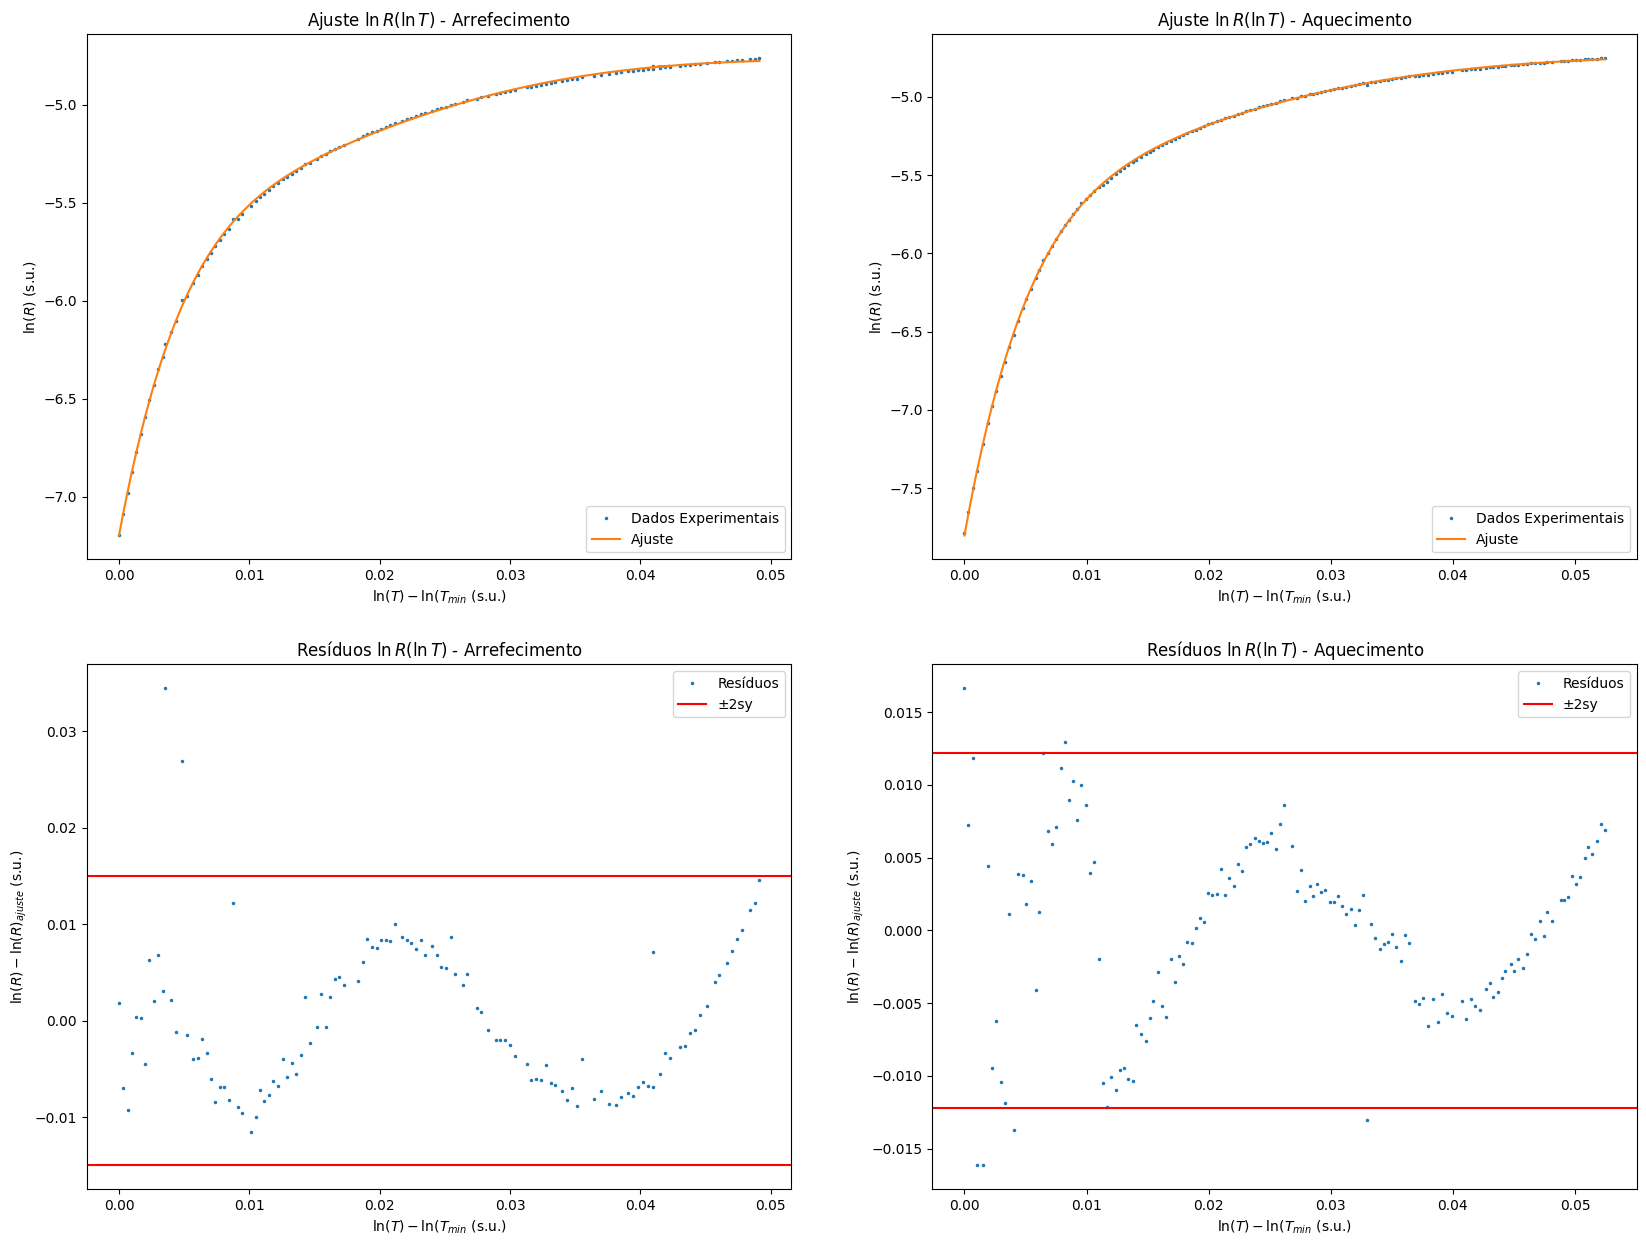

In [6]:
def test(x, A, B, C, D, E):
  return A*np.exp(B*x) + C*np.tanh(D*x) + E*x

lnTar2 = np.log(Tar2)
lnRar2 = np.log(Rar2)
lnTaq2 = np.log(Taq2)
lnRaq2 = np.log(Raq2)

lnTar2 = lnTar2 - lnTar2[-1]
lnTaq2 = lnTaq2 - lnTaq2[0]

pars, cov = curve_fit(test, lnTar2, lnRar2, maxfev=20000)
Aar = pars[0]
Bar = pars[1]
Car = pars[2]
Dar = pars[3]
Ear = pars[4]

ajlnar = Aar*np.exp(Bar*lnTar2) + Car*np.tanh(Dar*lnTar2) + Ear*lnTar2
reslnar = lnRar2 - ajlnar
sylnAr = np.sqrt(np.sum(reslnar**2)/(len(reslnar)-1))

pars, cov = curve_fit(test, lnTaq2, lnRaq2, maxfev=20000)
Aaq = pars[0]
Baq = pars[1]
Caq = pars[2]
Daq = pars[3]
Eaq = pars[4]


ajlnaq = Aaq*np.exp(Baq*lnTaq2) + Caq*np.tanh(Daq*lnTaq2) + Eaq*lnTaq2
reslnaq = lnRaq2 - ajlnaq
sylnAq = np.sqrt(np.sum(reslnaq**2)/(len(reslnaq)-1))


fig, fg = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))


fg[0,0].plot(lnTar2, lnRar2, '.', markersize=3, label='Dados Experimentais')
fg[0,0].plot(lnTar2, ajlnar, label='Ajuste')
fg[0,0].set_xlabel(r'$\ln(T)-\ln(T_{min}$ (s.u.)')
fg[0,0].set_ylabel(r'$\ln(R)$ (s.u.)')
fg[0,0].legend(loc='lower right')
fg[0,0].set_title(r'Ajuste $\ln R(\ln T)$ - Arrefecimento')

fg[1,0].plot(lnTar2, reslnar,'.', markersize=3, label='Resíduos')
fg[1,0].axhline(2*sylnAr, color='red', label='±2sy')
fg[1,0].axhline(-2*sylnAr, color='red')
fg[1,0].set_xlabel(r'$\ln(T)-\ln(T_{min}$ (s.u.)')
fg[1,0].set_ylabel(r'$\ln(R)-\ln(R)_{ajuste}$ (s.u.)')
fg[1,0].legend(loc='upper right')
fg[1,0].set_title(r'Resíduos $\ln R(\ln T)$ - Arrefecimento')

fg[0,1].plot(lnTaq2, lnRaq2, '.', markersize=3, label='Dados Experimentais')
fg[0,1].plot(lnTaq2, ajlnaq, label='Ajuste')
fg[0,1].set_xlabel(r'$\ln(T)-\ln(T_{min}$ (s.u.)')
fg[0,1].set_ylabel(r'$\ln(R)$ (s.u.)')
fg[0,1].legend(loc='lower right')
fg[0,1].set_title(r'Ajuste $\ln R(\ln T)$ - Aquecimento')

fg[1,1].plot(lnTaq2, reslnaq,'.', markersize=3, label='Resíduos')
fg[1,1].axhline(2*sylnAq, color='red', label='±2sy')
fg[1,1].axhline(-2*sylnAq, color='red')
fg[1,1].set_xlabel(r'$\ln(T)-\ln(T_{min}$ (s.u.)')
fg[1,1].set_ylabel(r'$\ln(R)-\ln(R)_{ajuste}$ (s.u.)')
fg[1,1].legend(loc='upper right')
fg[1,1].set_title(r'Resíduos $\ln R(\ln T)$ - Aquecimento')
fg[1,1].legend(loc='upper right')

Temos portanto:
$$\begin{align*}
\ln R&= A e^{B\ln T'} + C \tanh(D\ln T') + E\ln T'\\
&= A T'^{B}+ C \tanh(D\ln T') + E\ln T'
\end{align*}$$
em que usamos: $$\ln T' = \ln T- \ln T_{0}$$
e podemos desenvolver:
$$\begin{align*}
\ln T' &= \ln T-\ln T_{0}\\
T' &= \exp(\ln T-\ln T_{0})\\
&= e^{\ln T}e^{\ln T_{0}}\\
&= \frac{T}{T_{0}}
\end{align*}$$
e fica:
$$\begin{align*}
\ln R &= A T'^{B}+ C \tanh(D\ln T') + E\ln T'\\
R&= \exp \left( A T'^{B}+ C \tanh(D\ln T') + E\ln T'\right)\\
&= e^{\frac{A}{T_{0}^{B}}T^{B}} e^{C\tanh\left(D \ln\left(\frac{T}{T_{0}}\right)\right)} e^{E\ln T'}\\
&= e^{\frac{A}{T_{0}^{B}}T^{B}} e^{C\tanh\left(D \ln\left(\frac{T}{T_{0}}\right)\right)}\cdot T'^{E}\\
\end{align*}\quad\quad
\Huge {R(T)= \frac{1}{T_{0}^{E}}T^{E} e^{\frac{A}{T_{0}^{B}}T^{B}} e^{C\tanh\left(D \ln\left(\frac{T}{T_{0}}\right)\right)}}
$$

arrefecimento -  [ -7.19676382 -90.06614495  -4.52280796  63.79724547  -3.74795855] 107.05470420728302
aquecimento -  [ -7.80319146 -92.37560568   4.69275107 -60.97123509  -0.39625162] 107.16742154318102


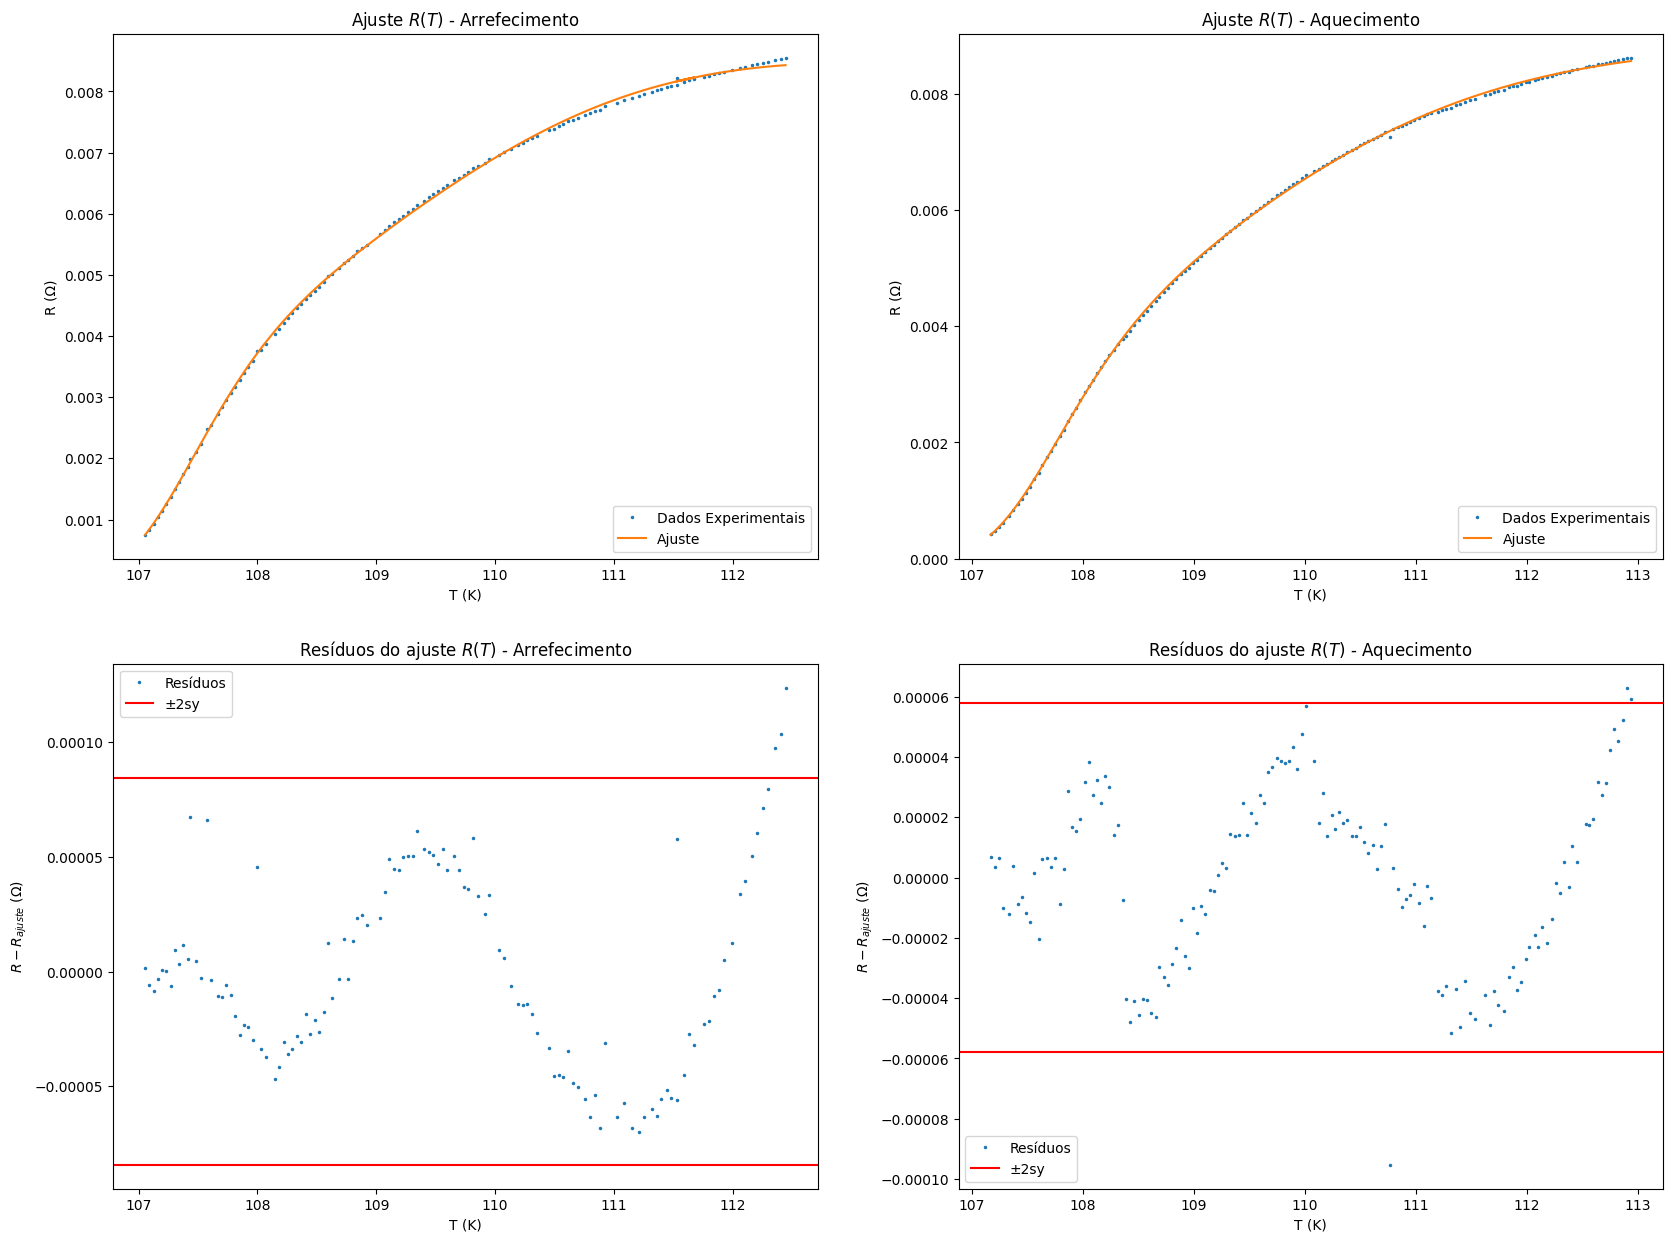

In [11]:
parsAr = np.array([Aar, Bar, Car, Dar, Ear])
parsAq = np.array([Aaq, Baq, Caq, Daq, Eaq])

print('arrefecimento - ',parsAr, np.min(Tar2))
print('aquecimento - ',parsAq, np.min(Taq2))

def f(x, pars, x0):
  A = pars[0]
  B = pars[1]
  C = pars[2]
  D = pars[3]
  E = pars[4]
  return 1/(x0**E)*x**E* np.exp(A/(x0**B)*x**B) * np.exp(C*np.tanh(D*np.log(x/x0)))

ajRealAr = f(Tar2, parsAr, np.min(Tar2))
resRealAr = Rar2 - ajRealAr
syRealAr = np.sqrt(np.sum(resRealAr**2)/(len(resRealAr)-1))

ajRealAq = f(Taq2, parsAq, np.min(Taq2))
resRealAq = Raq2 - ajRealAq
syRealAq = np.sqrt(np.sum(resRealAq**2)/(len(resRealAq)-1))


fig, fg = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

fg[0,0].plot(Tar2, Rar2, '.', markersize=3, label='Dados Experimentais')
fg[0,0].plot(Tar2, ajRealAr, label='Ajuste')
fg[0,0].set_xlabel('T (K)')
fg[0,0].set_ylabel('R (Ω)')
fg[0,0].set_title(r'Ajuste $R(T)$ - Arrefecimento')
fg[0,0].legend(loc='lower right')

fg[1,0].plot(Tar2, resRealAr,'.', markersize=3, label='Resíduos')
fg[1,0].set_xlabel('T (K)')
fg[1,0].set_ylabel(r'$R-R_{ajuste}$ (Ω)')
fg[1,0].set_title(r'Resíduos do ajuste $R(T)$ - Arrefecimento')
fg[1,0].axhline(2*syRealAr, label='±2sy', color='red')
fg[1,0].axhline(-2*syRealAr, color='red')
fg[1,0].legend(loc='upper left')

fg[0,1].plot(Taq2, Raq2, '.', markersize=3, label='Dados Experimentais')
fg[0,1].plot(Taq2, ajRealAq, label='Ajuste')
fg[0,1].set_xlabel('T (K)')
fg[0,1].set_ylabel('R (Ω)')
fg[0,1].set_title(r'Ajuste $R(T)$ - Aquecimento')
fg[0,1].legend(loc='lower right')

fg[1,1].plot(Taq2, resRealAq,'.', markersize=3, label='Resíduos')
fg[1,1].set_xlabel('T (K)')
fg[1,1].set_ylabel(r'$R-R_{ajuste}$ (Ω)')
fg[1,1].set_title(r'Resíduos do ajuste $R(T)$ - Aquecimento')
fg[1,1].axhline(2*syRealAq, label='±2sy', color='red')
fg[1,1].axhline(-2*syRealAq, color='red')
fg[1,1].legend(loc='lower left')

Queremos a derivada. Era bonito poder derivar à mão e obter a 2ª derivada. Mas esta função fica horrível. Assim, vou usar o código de derivadas de computacional.

TC arrefecimento = 107.47224833 K -- erro : -0.49 %
R(TC) = 0.00206 Ω
dR/dT max arrefeicmento = 0.00348 Ω/K

TC aquecimento = 107.78355593 K-- erro : -0.20 %
R(TC) = 0.00208 Ω
dR/dT max aquecimento = 0.00329 Ω/K

TC final = (107.6 ± 0.1) K = (107.6 ± 0.102 %) K -- erro : -0.34 %


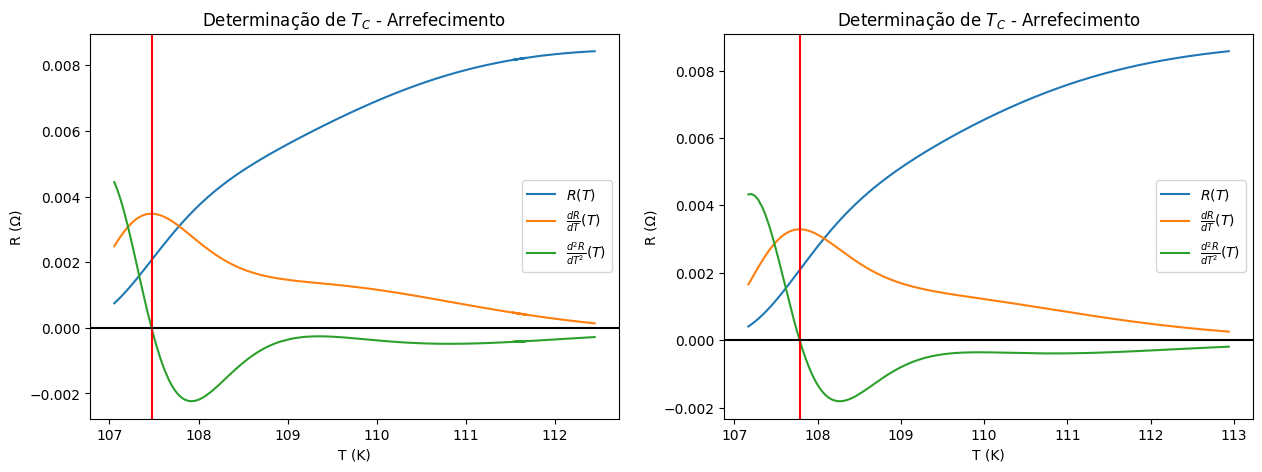

In [8]:
def derivCentro(f, x, h, errMax, pars, x0):
    Da = (f(x, pars, x0)-f(x-h, pars, x0))/h
    erro = errMax + 1
    while erro > errMax:
        h *= 0.5
        Db = (f(x+h/2, pars, x0)-f(x-h/2, pars, x0))/h
        erro = abs(Db - Da)/3 
        Da = Db
    return Db

def d2(f, x, h, errMax, pars, x0):
    Da = (f(x+h, pars, x0)-2*f(x, pars, x0)+f(x-h, pars, x0))/(h*h)
    erro = errMax + 1
    while erro > errMax:
        h *= 0.5
        Db = (f(x+h, pars, x0)-2*f(x, pars, x0)+f(x-h, pars, x0))/(h*h)
        erro = abs(Db - Da)* 4/3 
        Da = Db
    return Db

def g(x, pars, x0):
  return -derivCentro(f, x, 1, 1e-8, pars, x0)


def goldenR(x1, x4, dMax, pars, x0):
    ɸ = (1+np.sqrt(5))/2
    x2 = x1+(2-ɸ)*(x4-x1)
    x3 = x1+(ɸ-1)*(x4-x1)
    if (g(x2, pars, x0)>g(x1, pars, x0) and g(x2, pars, x0)>g(x4, pars, x0)) and (g(x3, pars, x0)>g(x1, pars, x0) and g(x3, pars, x0)>g(x4, pars, x0)):
        return None
    while abs(x4-x1) >= dMax:
        if g(x2, pars, x0) < g(x3, pars, x0):
            x4 = x3
            x3 = x2
            x2 = x1+(2-ɸ)*(x4-x1)
        else:
            x1 = x2
            x2 = x3
            x3 = x1+(ɸ-1)*(x4-x1)
    return (x1+x4)/2

derivadaAr = np.array([derivCentro(f, Tar2[i], 1, 1e-8, parsAr, np.min(Tar2)) for i in range(len(Tar2))])
segDerivadaAr = np.array([d2(f, Tar2[i], 1, 1e-8, parsAr, np.min(Tar2)) for i in range(len(Tar2))])
TcAr = goldenR(100, 112, 1e-8, parsAr, np.min(Tar2))
print(f"TC arrefecimento = {TcAr:.8f} K -- erro : {(TcAr-108)/108*100:.2f} %")
print(f"R(TC) = {f(TcAr, parsAr, np.min(Tar2)):.5f} Ω")
print(f"dR/dT max arrefeicmento = {derivCentro(f, TcAr, 1, 1e-8, parsAr, np.min(Tar2)):.5f} Ω/K")

print()

derivadaAq = np.array([derivCentro(f, Taq2[i], 1, 1e-8, parsAq, np.min(Taq2)) for i in range(len(Taq2))])
segDerivadaAq = np.array([d2(f, Taq2[i], 1, 1e-8, parsAq, np.min(Taq2)) for i in range(len(Taq2))])
TcAq = goldenR(100, 120, 1e-8, parsAq, np.min(Taq2))
print(f"TC aquecimento = {TcAq:.8f} K-- erro : {(TcAq-108)/108*100:.2f} %")
print(f"R(TC) = {f(TcAq, parsAq, np.min(Taq2)):.5f} Ω")
print(f"dR/dT max aquecimento = {derivCentro(f, TcAq, 1, 1e-8, parsAq, np.min(Taq2)):.5f} Ω/K")

print()

TcFinal = 0.5*(TcAr + TcAq)
uTcFinal = np.std(np.array([TcAr, TcAq]))/np.sqrt(2)

print(f"TC final = ({TcFinal:.1f} ± {uTcFinal:.1f}) K = ({TcFinal:.1f} ± {uTcFinal/TcFinal*100:.3f} %) K -- erro : {(TcFinal-108)/108*100:.2f} %")

fig, fg = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fg[0].plot(Tar2, ajRealAr, label=r'$R(T)$')
fg[0].plot(Tar2, derivadaAr, label=r'$\frac{dR}{dT}(T)$')
fg[0].plot(Tar2, segDerivadaAr, label=r'$\frac{d^2R}{dT^2}(T)$')
fg[0].axvline(TcAr, color='red')
fg[0].axhline(0, color='black')
fg[0].set_xlabel('T (K)')
fg[0].set_ylabel('R (Ω)')
fg[0].set_title(r'Determinação de $T_C$ - Arrefecimento')
fg[0].legend()

fg[1].plot(Taq2, ajRealAq, label=r'$R(T)$')
fg[1].plot(Taq2, derivadaAq, label=r'$\frac{dR}{dT}(T)$')
fg[1].plot(Taq2, segDerivadaAq, label=r'$\frac{d^2R}{dT^2}(T)$')
fg[1].axvline(TcAq, color='red')
fg[1].axhline(0, color='black')
fg[1].set_xlabel('T (K)')
fg[1].set_ylabel('R (Ω)')
fg[1].set_title(r'Determinação de $T_C$ - Arrefecimento')
fg[1].legend()

Text(0, 0.5, 'R(Ω)')

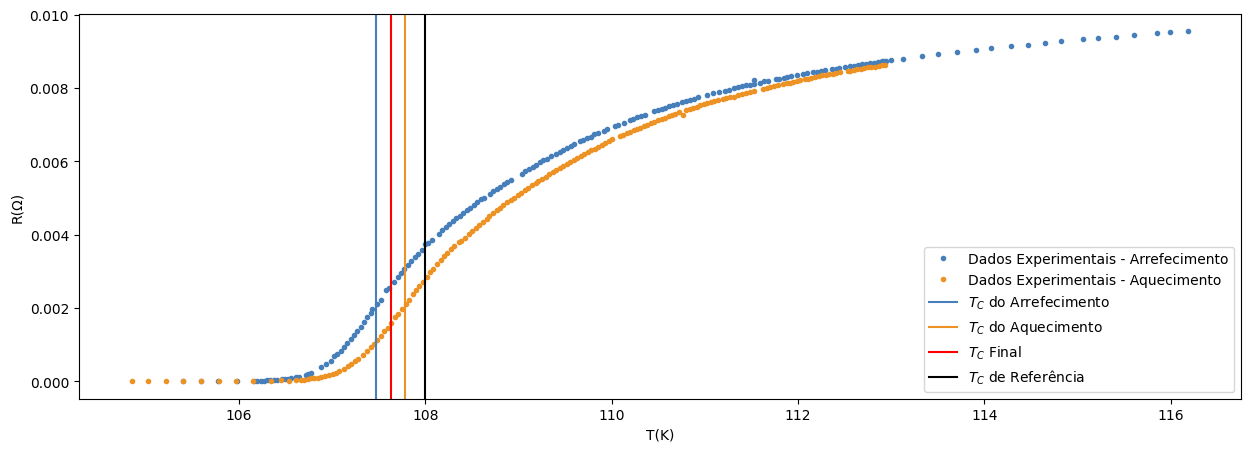

In [9]:
plt.figure(figsize=(15,5))

plt.plot(Tar[75:], Rar[75:], '.', color='#477fba', label='Dados Experimentais - Arrefecimento')
plt.plot(Taq[30:], Raq[30:], '.', color='#ed9224', label='Dados Experimentais - Aquecimento')
plt.axvline(TcAr, color='#477fba', label=r'$T_C$ do Arrefecimento')
plt.axvline(TcAq, color='#ed9224', label=r'$T_C$ do Aquecimento')
plt.axvline(TcFinal, color='red', label=r'$T_C$ Final')
plt.axvline(108, color='black', label=r'$T_C$ de Referência')
plt.legend(loc='lower right')
plt.xlabel('T(K)')
plt.ylabel('R(Ω)')
